## Partially Observable Markov Decision Processes

### Belief update

In [1]:
import numpy as np

from pomdpenvironment import BabyPOMDP, TigerPOMDP
from pomdpagent import POMDPAgent

In [2]:
model = BabyPOMDP()
# model = TigerPOMDP()

In [3]:
b1 = np.ones(model.n_states) / model.n_states
b2 = model.update_belief(b1, 'not-feed', 'crying')
b2

array([0.09278351, 0.90721649])

In [4]:
b3 = model.update_belief(b2, 'feed', 'not-crying')
b3

array([1., 0.])

In [5]:
b4 = model.update_belief(b3, 'not-feed', 'not-crying')
b4

array([0.97590361, 0.02409639])

### Value iteration

In [6]:
pomdpAgent = POMDPAgent(discount=0.9, threshold=0.00001, max_iter=1000, verbose=False)

In [7]:
pomdpAgent.reset()
pomdpAgent.value_iteration(model, 200, prune=True)
exact_vectors = pomdpAgent.gamma

Level 1 # of alpha vectors: 2
Level 2 # of alpha vectors: 2
Level 3 # of alpha vectors: 3
Level 4 # of alpha vectors: 2
Level 5 # of alpha vectors: 2
Level 6 # of alpha vectors: 2
Level 7 # of alpha vectors: 2
Level 8 # of alpha vectors: 2
Level 9 # of alpha vectors: 2
Level 10 # of alpha vectors: 2
Level 11 # of alpha vectors: 2
Level 12 # of alpha vectors: 2
Level 13 # of alpha vectors: 2
Level 14 # of alpha vectors: 2
Level 15 # of alpha vectors: 2
Level 16 # of alpha vectors: 2
Level 17 # of alpha vectors: 2
Level 18 # of alpha vectors: 2
Level 19 # of alpha vectors: 2
Level 20 # of alpha vectors: 2
Level 21 # of alpha vectors: 2
Level 22 # of alpha vectors: 2
Level 23 # of alpha vectors: 2
Level 24 # of alpha vectors: 2
Level 25 # of alpha vectors: 2
Level 26 # of alpha vectors: 2
Level 27 # of alpha vectors: 2
Level 28 # of alpha vectors: 2
Level 29 # of alpha vectors: 2
Level 30 # of alpha vectors: 2
Level 31 # of alpha vectors: 2
Level 32 # of alpha vectors: 2
Level 33 # of alp

feed [-19.67493495 -29.67493495]
not-feed [-16.30548328 -38.2511624 ]


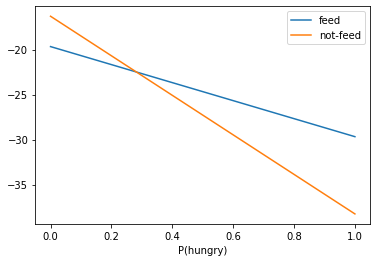

In [8]:
model.show_alpha_vector(pomdpAgent.gamma)
model.plot_alpha_vector(pomdpAgent.gamma)

### QMDP approximation

In [9]:
pomdpAgent.reset()
pomdpAgent.qmdp(model)
qmdp_vectors = pomdpAgent.gamma

Iteration 0 value difference 30.000000
Iteration 1 value difference 9.900000
Iteration 2 value difference 7.299000
Iteration 3 value difference 3.879090
Iteration 4 value difference 3.733282
Iteration 5 value difference 3.338165
Iteration 6 value difference 3.006309
Iteration 7 value difference 2.705502
Iteration 8 value difference 2.434967
Iteration 9 value difference 2.191469
Iteration 10 value difference 1.972323
Iteration 11 value difference 1.775090
Iteration 12 value difference 1.597581
Iteration 13 value difference 1.437823
Iteration 14 value difference 1.294041
Iteration 15 value difference 1.164637
Iteration 16 value difference 1.048173
Iteration 17 value difference 0.943356
Iteration 18 value difference 0.849020
Iteration 19 value difference 0.764118
Iteration 20 value difference 0.687706
Iteration 21 value difference 0.618936
Iteration 22 value difference 0.557042
Iteration 23 value difference 0.501338
Iteration 24 value difference 0.451204
Iteration 25 value difference 0.40

not-feed [-12.38529926 -33.53208825]
feed [-16.14676715 -26.14676715]


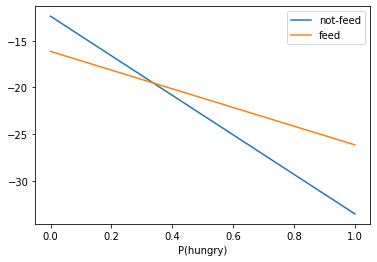

In [10]:
model.show_alpha_vector(pomdpAgent.gamma)
model.plot_alpha_vector(pomdpAgent.gamma)

### Fast informed bound

In [11]:
pomdpAgent.reset()
pomdpAgent.fib(model)
fib_vectors = pomdpAgent.gamma.copy()

Iteration 0 value difference 30.000000
Iteration 1 value difference 9.900000
Iteration 2 value difference 7.659000
Iteration 3 value difference 4.870161
Iteration 4 value difference 4.938793
Iteration 5 value difference 4.418390
Iteration 6 value difference 3.972085
Iteration 7 value difference 3.576070
Iteration 8 value difference 3.218331
Iteration 9 value difference 2.896501
Iteration 10 value difference 2.606853
Iteration 11 value difference 2.346167
Iteration 12 value difference 2.111551
Iteration 13 value difference 1.900395
Iteration 14 value difference 1.710356
Iteration 15 value difference 1.539320
Iteration 16 value difference 1.385388
Iteration 17 value difference 1.246849
Iteration 18 value difference 1.122165
Iteration 19 value difference 1.009948
Iteration 20 value difference 0.908953
Iteration 21 value difference 0.818058
Iteration 22 value difference 0.736252
Iteration 23 value difference 0.662627
Iteration 24 value difference 0.596364
Iteration 25 value difference 0.53

not-feed [-16.07140753 -36.5178361 ]
feed [-19.46426467 -29.46426467]


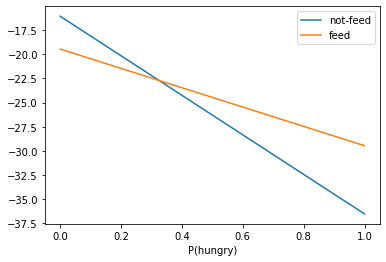

In [12]:
model.show_alpha_vector(pomdpAgent.gamma)
model.plot_alpha_vector(pomdpAgent.gamma)

In [13]:
import matplotlib.pylab as plt

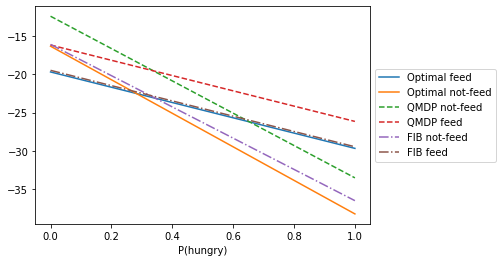

In [14]:
for av in exact_vectors:
    plt.plot([0, 1], av.value, label='Optimal %s' %model.actions[av.action])

for av in qmdp_vectors:
    plt.plot([0, 1], av.value, ls='--', label='QMDP %s' %model.actions[av.action])

for av in fib_vectors:
    plt.plot([0, 1], av.value, ls='-.', label='FIB %s' %model.actions[av.action])

plt.xlabel('P(%s)' % model.states[1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [15]:
belief = np.ones(model.n_states) / model.n_states
av = pomdpAgent.backup_belief(model, belief)

In [16]:
av.action, av.value

(1, array([-19.46426677, -29.46426677]))